In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.svm import SVC
import seaborn as sns

In [83]:
data_frame = pd.read_csv('loan.csv')

In [84]:
data_frame.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [85]:
data_frame.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [86]:
data_frame = data_frame.dropna()

In [87]:
# LP002161,Female,No,1,Graduate,No,4723,0,81,360,1,Semiurban,N
# LP002170,Male,Yes,2,Graduate,No,5000,3667,236,360,1,Semiurban,Y
# LP002175,Male,Yes,0,Graduate,No,4750,2333,130,360,1,Urban,Y

In [88]:
data_frame.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [89]:
X = data_frame.drop(columns=['Loan_ID','Loan_Status'])

In [90]:
X = X.replace(to_replace='3+',value=4)

In [91]:
X = X.replace({'Married':{'No':0,"Yes":1}})

In [92]:
X = X.replace({'Self_Employed':{'No':0,"Yes":1}})

In [93]:
X = X.replace({'Gender':{'Female':0,"Male":1}})

In [94]:
X = X.replace({'Property_Area':{'Rural':0,"Urban":2,'Semiurban':1}})

In [95]:
X = X.replace({'Education':{'Not Graduate':0,"Graduate":1}})

In [96]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
606,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0
607,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0
608,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2
609,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2


In [97]:
Y = data_frame['Loan_Status']

In [98]:
Y = Y.map({'Y':1,'N':0})

In [99]:
Y

1      0
2      1
3      1
4      1
5      1
      ..
606    1
607    1
608    1
609    1
610    0
Name: Loan_Status, Length: 477, dtype: int64

In [100]:
model = SVC()

In [101]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,shuffle=True,stratify=Y,random_state=42)

In [102]:
model.fit(X_train,Y_train)

SVC()

In [103]:
train_pred = model.predict(X_train)
train_acc = accuracy_score(Y_train,train_pred)
print(train_acc)

0.7060367454068242


In [104]:
test_pred = model.predict(X_test)
test_acc = accuracy_score(Y_test,test_pred)
print(test_acc)

0.6875


Neural Network Implementation

In [107]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [108]:
X_train_std = scaler.fit_transform(X_train)

In [109]:
X_test_std = scaler.fit_transform(X_test)

In [110]:
X_train_std

array([[ 0.47442638, -1.36552615, -0.72379552, ...,  0.25074245,
         0.38866104,  1.26272828],
       [ 0.47442638,  0.73231846, -0.72379552, ...,  0.25074245,
         0.38866104, -0.01339765],
       [ 0.47442638,  0.73231846,  0.07321631, ...,  0.25074245,
         0.38866104,  1.26272828],
       ...,
       [ 0.47442638,  0.73231846, -0.72379552, ...,  0.25074245,
        -2.57293607, -1.28952358],
       [ 0.47442638,  0.73231846,  0.07321631, ...,  0.25074245,
         0.38866104,  1.26272828],
       [ 0.47442638,  0.73231846, -0.72379552, ...,  0.25074245,
         0.38866104, -0.01339765]])

In [112]:
X.shape

(477, 11)

In [111]:
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(3)

In [121]:
model = keras.Sequential([
                        keras.layers.Flatten(input_shape=(11,)),
                        keras.layers.Dense(60,activation='relu'),
                        keras.layers.Dense(80,activation='relu'),
                        keras.layers.Dense(2,activation='sigmoid')
                        ])

In [122]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 11)                0         
                                                                 
 dense_6 (Dense)             (None, 60)                720       
                                                                 
 dense_7 (Dense)             (None, 80)                4880      
                                                                 
 dense_8 (Dense)             (None, 2)                 162       
                                                                 
Total params: 5,762
Trainable params: 5,762
Non-trainable params: 0
_________________________________________________________________


In [123]:
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy']
            )

In [127]:
history = model.fit(X_train_std,Y_train,validation_split=0.25,epochs=50,batch_size=16)

Epoch 1/50
18/18 [==============================] - 0s 22ms/step - loss: 0.2441 - accuracy: 0.9193 - val_loss: 0.7800 - val_accuracy: 0.7500
Epoch 2/50
18/18 [==============================] - 0s 7ms/step - loss: 0.2428 - accuracy: 0.9088 - val_loss: 0.8137 - val_accuracy: 0.7500
Epoch 3/50
18/18 [==============================] - 0s 8ms/step - loss: 0.2419 - accuracy: 0.9193 - val_loss: 0.7818 - val_accuracy: 0.7396
Epoch 4/50
18/18 [==============================] - 0s 12ms/step - loss: 0.2333 - accuracy: 0.9158 - val_loss: 0.8175 - val_accuracy: 0.7396
Epoch 5/50
18/18 [==============================] - 0s 8ms/step - loss: 0.2213 - accuracy: 0.9193 - val_loss: 0.8047 - val_accuracy: 0.7396
Epoch 6/50
18/18 [==============================] - 0s 8ms/step - loss: 0.2199 - accuracy: 0.9193 - val_loss: 0.7930 - val_accuracy: 0.7396
Epoch 7/50
18/18 [==============================] - 0s 8ms/step - loss: 0.2206 - accuracy: 0.9263 - val_loss: 0.8523 - val_accuracy: 0.7500
Epoch 8/50
18/18 [

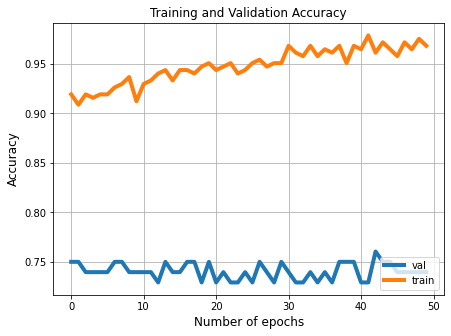

In [128]:
plt.figure(figsize=(7,5))
plt.plot(history.history['val_accuracy'],linewidth = 4)
plt.plot(history.history['accuracy'],linewidth = 4)

plt.title("Training and Validation Accuracy",fontsize=12)
plt.ylabel("Accuracy",fontsize=12)
plt.xlabel("Number of epochs",fontsize=12)
plt.legend(['val','train'],loc = 'lower right')
plt.grid()

plt.show()

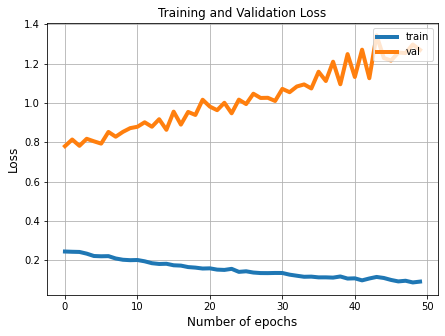

In [129]:
plt.figure(figsize=(7,5))
plt.plot(history.history['loss'],linewidth = 4)
plt.plot(history.history['val_loss'],linewidth = 4)

plt.title("Training and Validation Loss",fontsize=12)
plt.ylabel("Loss",fontsize=12)
plt.xlabel("Number of epochs",fontsize=12)
plt.legend(['train','val'],loc = 'upper right')
plt.grid()
plt.show()


In [130]:
loss,accuracy = model.evaluate(X_test_std,Y_test)

3/3 [==============================] - 0s 4ms/step - loss: 1.1673 - accuracy: 0.7292


In [142]:
Y_test.shape

(96,)

In [155]:
X_test_std[92]

array([ 0.43033148, -1.32017315, -0.62410626,  0.52915026, -0.25819889,
       -0.28140843, -0.87304307, -0.86140593,  1.95941509,  0.51298918,
        1.25436302])

In [148]:
len(X_test_std)

96

In [132]:
test_pred = model.predict(X_test_std)
test_pred[0]

array([0.18088472, 0.7101284 ], dtype=float32)

In [156]:
test_input = ( 0.43033148, -1.32017315, -0.62410626,  0.52915026, -0.25819889,
       -0.28140843, -0.87304307, -0.86140593,  1.95941509,  0.51298918,
        1.25436302)
test_input = np.asarray(test_input)
test_input_new = test_input.reshape(1,-1)

prediction = model.predict(test_input_new)
print(prediction)

prediction_labels = [np.argmax(prediction)]
print(prediction_labels)

if prediction_labels[0] == 1:
    print("Approved")
else:
    print("Denied")

[[0.6364427  0.38833988]]
[0]
Denied
